# Your Turn! - SUNY Oswego SOURCE

- Data from DOW6 have been processed for SOURCE and are available. 
- Below, a sample file has been staged for your use. 

In [2]:
# File Location
dow_file = 'data/cfrad.20240404_060356.104_DOW6_v170_s17_el1.92_SUR.nc'

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Question 1 - Easy</p>
    Similar to the previous notebook, create a PPI display of the DOW radar data
</div>

### Solution - Read in the DOW file and use the plotting cell from previous notebook

In [26]:
# first read in pyart and associated libraries 
import warnings
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

import pyart

from metpy.plots import USCOUNTIES

import cartopy.crs as ccrs
import cartopy.feature as cfeature

warnings.filterwarnings('ignore')

In [4]:
# Read in the DOW file
radar = pyart.io.read(dow_file)

In [8]:
# Determine what parameters are within the radar object; similiar to previous notebook
# Note - variable names have changed and new fields added with DOW processing.
radar.fields.keys()

dict_keys(['NCP', 'TRIP_FLA', 'SNRHC', 'SNRVC', 'DBMHC', 'DBMVC', 'DBZHC', 'DBZHC_F', 'DBZVC', 'DBZVC_F', 'VEL', 'VEL_F', 'VS', 'VS_F', 'VL', 'VL_F', 'WIDTH', 'ZDRM', 'RHOHV', 'PHIDP', 'KDP'])

In [17]:
# inspection the radar object if you need more information
radar?

Type:        Radar
String form: <pyart.core.radar.Radar object at 0x2830c2fc0>
File:        ~/micromamba/envs/oswego-radar/lib/python3.12/site-packages/pyart/core/radar.py
Docstring:  
A class for storing antenna coordinate radar data.

The structure of the Radar class is based on the CF/Radial Data file
format. Global attributes and variables (section 4.1 and 4.3) are
represented as a dictionary in the metadata attribute. Other required and
optional variables are represented as dictionaries in a attribute with the
same name as the variable in the CF/Radial standard. When a optional
attribute not present the attribute has a value of None. The data for a
given variable is stored in the dictionary under the 'data' key. Moment
field data is stored as a dictionary of dictionaries in the fields
attribute. Sub-convention variables are stored as a dictionary of
dictionaries under the meta_group attribute.

Refer to the attribute section for information on the parameters.

Attributes
---------

In [16]:
# Determine what type of file we are dealing with
# is it PPI scan, RHI scan, one elevation scan, multiple?
print('number of sweeps', radar.nsweeps)
print('number of gates', radar.ngates)
print('number of rays', radar.nrays)

number of sweeps 1
number of gates 989
number of rays 720


In [29]:
# Determine the range of Azimuth angles 
print(np.min(radar.azimuth['data']))
print(np.max(radar.azimuth['data']))

0.3
359.8


In [19]:
radar.instrument_parameters.keys()

dict_keys(['frequency', 'follow_mode', 'pulse_width', 'prt_mode', 'prt', 'prt_ratio', 'polarization_mode', 'nyquist_velocity', 'unambiguous_range', 'n_samples', 'radar_antenna_gain_h', 'radar_antenna_gain_v', 'radar_beam_width_h', 'radar_beam_width_v', 'radar_rx_bandwidth', 'measured_transmit_power_v', 'measured_transmit_power_h'])

In [36]:
# helpful to know
radar.instrument_parameters['nyquist_velocity']

{'long_name': 'unambiguous_doppler_velocity',
 'units': 'meters per second',
 '_FillValue': -9999.0,
 'meta_group': 'instrument_parameters',
 'data': masked_array(data=[28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703533, 28.703533, 28.703533, 28.703533, 28.703533,
                    28.703

In [21]:
# Check metadata within file for additional information on scan strategies
radar.metadata

{'Conventions': 'CF-1.7',
 'Sub_conventions': 'CF-Radial instrument_parameters radar_parameters radar_calibration',
 'version': 'CF-Radial-1.4',
 'title': '',
 'institution': '',
 'references': '',
 'source': '',
 'history': '',
 'comment': 'Written by DoradeRadxFile object',
 'original_format': 'CFRADIAL',
 'driver': '',
 'created': '',
 'start_datetime': '2024-04-04T06:03:56Z',
 'time_coverage_start': '2024-04-04T06:03:56Z',
 'start_time': '2024-04-04 06:03:56.104',
 'end_datetime': '2024-04-04T06:04:07Z',
 'time_coverage_end': '2024-04-04T06:04:07Z',
 'end_time': '2024-04-04 06:04:07.977',
 'instrument_name': 'DOW6low',
 'site_name': 'DOW6low',
 'scan_name': '',
 'scan_id': 0,
 'platform_is_mobile': 'false',
 'n_gates_vary': 'false',
 'ray_times_increase': 'true',
 'volume_number': 170,
 'platform_type': 'fixed',
 'instrument_type': 'radar',
 'primary_axis': 'axis_z'}

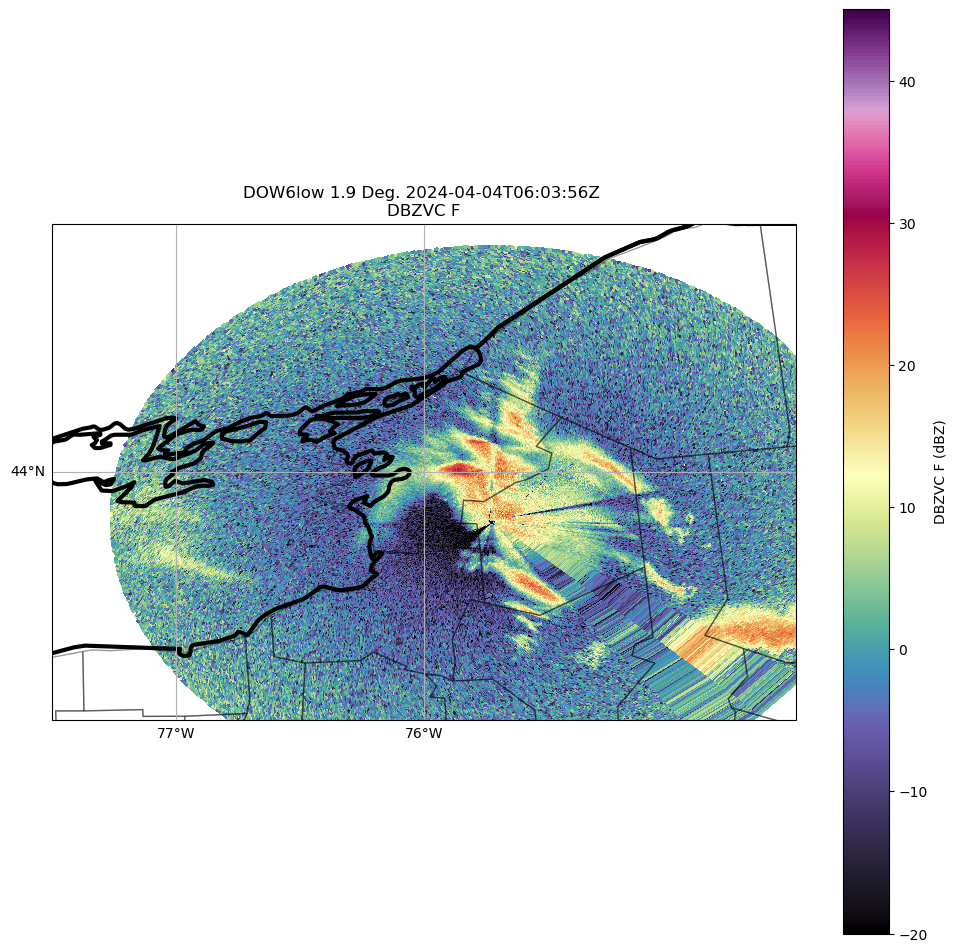

In [13]:
#-------------------
# Plot the Radar PPI
#-------------------
bounds = [43.0, 45.0, -77.5, -74.5]

fig = plt.figure(figsize=[12, 12])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
#ax1 = fig.add_subplot(111)

ax1.add_feature(cfeature.STATES, linewidth=3)
ax1.add_feature(USCOUNTIES, alpha=0.4)

# Create the Radar Display Object
display = pyart.graph.RadarMapDisplay(radar)

# Plot the reflectivty
# Note - I did not add the sweep parameter since there is only one sweep per file!
display.plot_ppi_map('DBZVC_F', 
                     ax=ax1,
                     vmin=-20,
                     vmax=45,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None,
                     cmap="pyart_ChaseSpectral")

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Question 2 - Intermediate</p>
    What type of precipitation occured (i.e. hydrometeor classification) can rely upon a
    a variety of radar parameters. 
    Create a display of a radar field that can used to identify specific hydrometeors. 
</div>

### Solution - Compare Equivalent Radar Reflectivity Factor, Differential Reflectivity, and Coorelation Coefficient

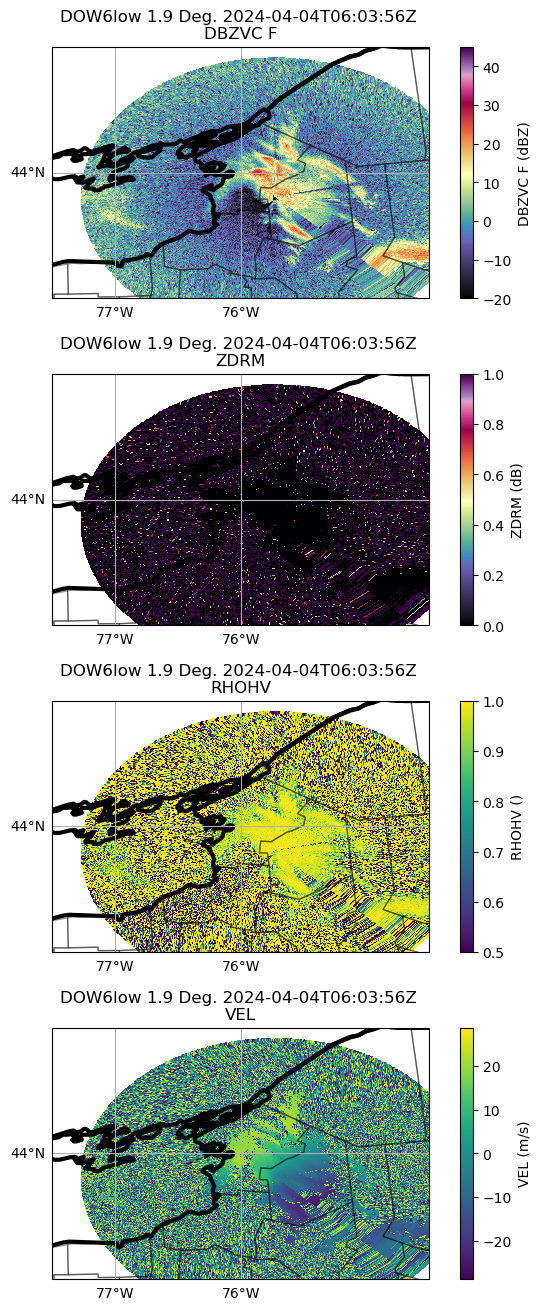

In [59]:
# To compare 3 simultaneous fields, we leverage matplotlib and make a multi-panel plot(s)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[8, 16], subplot_kw={"projection": ccrs.PlateCarree()})

# adjust space between subplots
fig.subplots_adjust(hspace=0.3)

# Reflectivity
# Note - I assigned the display to axis 1 using the 'ax' feature
display.plot_ppi_map('DBZVC_F', 
                     ax=ax1,
                     vmin=-20,
                     vmax=45,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None,
                     cmap="pyart_ChaseSpectral")

ax1.add_feature(cfeature.STATES, linewidth=3)
ax1.add_feature(USCOUNTIES, alpha=0.4)

# Differential Reflectivity
# Reflectivity
# Note - I assigned the display to axis 1 using the 'ax' feature
display.plot_ppi_map('ZDRM', 
                     ax=ax2,
                     vmin=0,
                     vmax=1,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None,
                     cmap="pyart_ChaseSpectral")
ax2.add_feature(cfeature.STATES, linewidth=3)
ax2.add_feature(USCOUNTIES, alpha=0.4)

# Correlation Coefficient
# Note - I assigned the display to axis 1 using the 'ax' feature
display.plot_ppi_map('RHOHV', 
                     ax=ax3,
                     vmin=0.5,
                     vmax=1,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None)
ax3.add_feature(cfeature.STATES, linewidth=3)
ax3.add_feature(USCOUNTIES, alpha=0.4)

# Velocity
# Note - I assigned the display to axis 1 using the 'ax' feature
display.plot_ppi_map('VEL', 
                     ax=ax4,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None)
ax4.add_feature(cfeature.STATES, linewidth=3)
ax4.add_feature(USCOUNTIES, alpha=0.4)

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Question 3 - Hard</p>
    Equivalent Radar Reflectivity factor can be used to determine precipitation rates. Create a function to calculate snowfall from this field and display snowfall rates using the following equation
</div>

# Z-S Relationships

$Z = A*S ^ {B}$

Where:
- Z = Reflectivity in dBZ
- A = Coefficient applied to Z-S Relationship (not in the exponent)
- S = Liquid snowfall rate
- B = Coefficient applied to Z-S Relationship (in the exponent)

We also need to apply a snow water equivalent ratio (`swe`) to convert from liquid to snow (ex. 8 inches of snow --> 1 inch of rain would be 8.0).

This equation now becomes:

$Z = swe*A*S ^ {B}$

Solving for S, we get:

$S = swe * (\frac{z}{a})^{1/B}$

Where z is reflectivity in units of dB ($z =10^{Z/10}$)

### Solution - Calculate new field from above equation and reflectivity, add it back into the radar object, and display

In [64]:
def snow_rate(radar, swe_ratio, A, B):
    """
    Snow rate applied to a pyart.Radar object
    
    Takes a given Snow Water Equivilent ratio (swe_ratio), A and B value
    for the Z-S relationship and creates a radar field similar to DBZ
    showing the radar estimated snowfall rate in mm/hr. Then the given
    SWE_ratio, A and B are stored in the radar metadata for later 
    reference.

    """
    # Setting up for Z-S relationship:
    snow_z = radar.fields['DBZHC_F']['data'].copy()
    # Convert it from dB to linear units
    z_lin = 10.0**(radar.fields['DBZHC_F']['data']/10.)
    # Apply the Z-S relation.
    snow_z = swe_ratio * (z_lin/A)**(1./B)
    # Add the field back to the radar. Use reflectivity as a template
    radar.add_field_like('DBZHC_F', 'snow_z',  snow_z,
                         replace_existing=True)
    # Update units and metadata
    radar.fields['snow_z']['units'] = 'mm/h'
    radar.fields['snow_z']['standard_name'] = 'snowfall_rate'
    radar.fields['snow_z']['long_name'] = 'snowfall_rate_from_z'
    radar.fields['snow_z']['valid_min'] = 0
    radar.fields['snow_z']['valid_max'] = 500
    radar.fields['snow_z']['swe_ratio'] = swe_ratio
    radar.fields['snow_z']['A'] = A
    radar.fields['snow_z']['B'] = B
    return radar

### Call the above function to calculate snowfall rates with your chosen relationship

| Reference   |    A    |    B    |    Band     |
| ----------- | ------- | ------- | ----------- |
| Matrosov et al.(2009) Braham(1990) | 67 | 1.28 | X | 

In [75]:
radar = snow_rate(radar, 8.5, 67, 1.28)

In [76]:
# Check the new field, snow_z, is within the radar object
radar.fields.keys()

dict_keys(['NCP', 'TRIP_FLA', 'SNRHC', 'SNRVC', 'DBMHC', 'DBMVC', 'DBZHC', 'DBZHC_F', 'DBZVC', 'DBZVC_F', 'VEL', 'VEL_F', 'VS', 'VS_F', 'VL', 'VL_F', 'WIDTH', 'ZDRM', 'RHOHV', 'PHIDP', 'KDP', 'snow_z'])

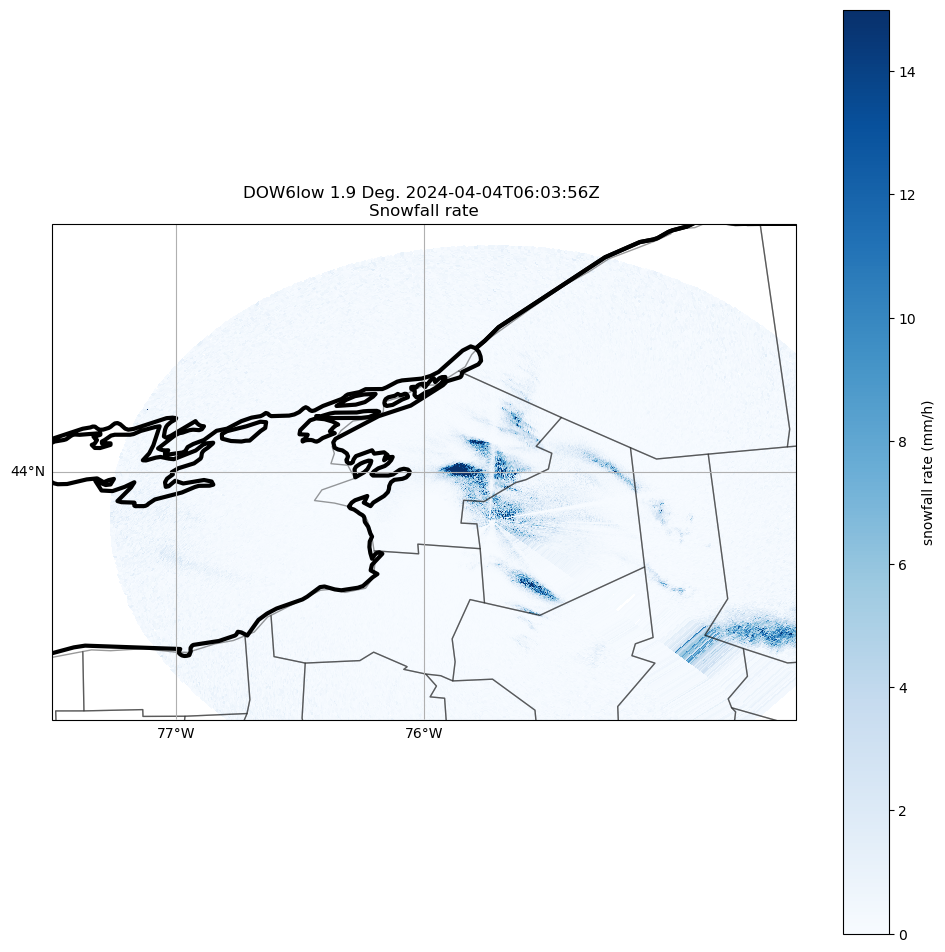

In [80]:
# Now display the snowfall rates
#-------------------
# Plot the Radar PPI
#-------------------
bounds = [43.0, 45.0, -77.5, -74.5]

fig = plt.figure(figsize=[12, 12])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
#ax1 = fig.add_subplot(111)

ax1.add_feature(cfeature.STATES, linewidth=3)
ax1.add_feature(USCOUNTIES, alpha=0.4)

# Create the Radar Display Object
display = pyart.graph.RadarMapDisplay(radar)

# Plot the reflectivty
# Note - I did not add the sweep parameter since there is only one sweep per file!
display.plot_ppi_map('snow_z', 
                     ax=ax1,
                     vmin=0,
                     vmax=15,
                     min_lat=bounds[0],
                     max_lat=bounds[1],
                     min_lon=bounds[2],
                     max_lon=bounds[3],
                     embellish=False,
                     norm=None,
                     cmap='Blues')